# Google Analytics(GA4) 사용자 행동 로그(Event Log) 분석

## 1. 사용자 행동 흐름(UX) 분석
- **event_name**: 이벤트 유형(예: *screen_view, scroll, click* 등)을 나타냅니다.  
  - 어떤 기능(화면 보기, 스크롤, 클릭 등)이 많이 사용되는지를 파악해 UX 개선이나 기능별 중요도 설정 등에 활용할 수 있습니다.
- **event_params**: 이벤트에 대한 세부 파라미터(*scroll_depth, button_name* 등)가 포함되어 있을 수 있습니다.  
  - 이벤트별 구체적인 맥락(예: 몇 %까지 스크롤했는지, 어떤 버튼이 클릭되었는지 등)을 확인해 고객 여정(Customer Journey)을 세부적으로 분석할 수 있습니다.

이를 통해 **사용자가 앱(또는 웹사이트) 내에서 어떤 경로를 거쳐 어떤 행동을 수행하는지** 파악할 수 있으며, **핵심 이탈 지점**을 찾거나 **사용성 개선 포인트**를 도출하는 데 도움이 됩니다.

---

## 2. 마케팅 채널 및 트래픽 소스 분석
- **collected_traffic_source**, **session_traffic_source_last_click**, **publisher**: 사용자가 어떤 채널(검색, SNS, 광고, 이메일 등)을 통해 유입되었는지를 보여주는 정보로 보입니다.  
  - 각각의 채널(또는 캠페인, 매체)에서 유입된 사용자가 실제로 앱/웹에서 얼마나 활동하는지, 전환(구매, 회원가입 등)을 얼마나 일으키는지를 판단하는 데 활용됩니다.
  - 마케팅 비용 대비 성과(ROAS, CPA 등)를 평가하거나 예산을 효율적으로 배분하는 데에 필수적인 지표입니다.

---

## 3. 사용자 식별 및 속성 파악
- **user_id** / **user_pseudo_id**:  
  - *user_id*는 로그인 등으로 식별된 사용자의 ID를 의미할 수 있고,  
  - *user_pseudo_id*는 로그인하지 않은 사용자(또는 디바이스)에 대한 익명 ID를 의미합니다.
- **user_properties**: 각 사용자에게 귀속된 속성(예: 회원 레벨, OS 버전, 가입일, 성별, 관심 카테고리 등)이 들어 있을 수 있습니다.
- **user_first_touch_timestamp**: 사용자가 처음 앱/웹을 접속한 시점으로, 가입 후 얼마나 시간이 지났는지, 신규 vs. 기존 사용자인지 등을 구분할 수 있습니다.
- **is_active_user**: 해당 사용자가 활성 사용자(최근 접속 등)인지 여부를 나타냅니다.  
  - 이를 통해 **사용자 세분화(Segmentation)**, **리텐션(Retention) 분석**, **이탈률** 등을 계산할 수 있습니다.

이러한 정보들은 “**어떤 사용자들이 자주 활동하는가?**” “**어떤 특성을 가진 사용자들이 높은 전환율을 보이는가?**” 등의 질문에 답할 수 있게 해 줍니다.

---

## 4. 시간 및 세션 분석
- **event_date**, **event_timestamp**: 이벤트 발생 날짜 및 구체적 시간(마이크로초 단위) 정보를 나타냅니다.  
  - 시간대별 트래픽 변화를 분석하거나, 특정 캠페인 진행 기간 동안의 효과 측정을 할 수 있습니다.
- **event_previous_timestamp**: 바로 이전 이벤트가 발생한 시점과의 차이를 통해 세션 길이나 사용자 행동 간격 등을 추정할 수 있습니다.
- **batch_event_index**: 같은 세션(또는 배치) 내 이벤트 순서를 나타낼 수 있습니다.  
  - 사용자 한 세션 내에서 어떤 이벤트 시퀀스로 행동이 일어났는지, 전환 경로에 이탈 지점이 어딘지 등의 파악에 유용합니다.

---

## 5. 매출/이커머스 분석
- **event_value_in_usd**: 이벤트가 발생했을 때의 매출(혹은 가치)이 달러 단위로 집계되는 컬럼으로 보이지만, 현재는 결측치(0 non-null) 상태입니다.  
  - 실제 구매 이벤트(purchase, ecommerce_purchase) 등에 대하여 매출액을 기록할 수 있으며, 이를 통해 **ARPU(사용자당 평균 매출)**, **ROAS(광고 대비 매출)** 등의 지표를 계산할 수 있습니다.
- **ecommerce**, **items**: 전자상거래 상세 정보(상품 ID, 카테고리, 가격, 수량 등)를 담을 수 있는 JSON 형태 컬럼입니다.  
  - 구매(결제) 또는 장바구니 담기 등의 이벤트가 제대로 기록되었다면, **품목별 매출 분석**, **장바구니 이탈분석**, **구매 퍼널 분석** 등이 가능해집니다.

현재 데이터 예시에서는 대부분 비어 있으므로, **전자상거래 기능을 사용하지 않거나 아직 설정이 안 된 상태**로 추정됩니다. 추후 GA4 이커머스 설정을 통해 구매 이벤트가 기록된다면 매출 분석이 가능해집니다.

---

## 6. 디바이스 및 지역(Geo) 분석
- **device**, **geo**, **app_info**, **platform**:  
  - 사용자가 어떤 기기를 사용하며(스마트폰 OS, 브라우저 등), 어느 지역에서(geo) 접속했는지, 앱 버전(app_info) 등이 담겨 있을 수 있습니다.
  - 이를 통해 **디바이스별 이탈률**, **버전별 에러 발생률**, **지역별 매출/전환율** 등을 모니터링하여, 향후 디바이스 호환성 개선이나 특정 지역을 타겟팅한 마케팅 전략에 활용할 수 있습니다.

---

## 7. 전반적인 비즈니스 활용 시사점
1. **사용자 참여도(Engagement) 파악**  
   - *screen_view*, *scroll* 등의 이벤트 빈도, 스크롤 깊이, 체류 시간 등을 통해 **콘텐츠 소비 행태**와 **주요 이탈 지점**을 식별할 수 있습니다.  
   - 이를 토대로 사이트/앱 UI·UX 개선을 추진하거나, 콘텐츠 전략을 재정비할 수 있습니다.

2. **마케팅 채널 성과 측정**  
   - *collected_traffic_source* 및 *session_traffic_source_last_click* 같은 컬럼을 활용해 **채널별 유입량**, **전환율**, **재방문율** 등을 구분해서 분석할 수 있습니다.  
   - 어떤 채널에서 온 사용자가 가장 오래 머무르고, 구매나 회원가입으로 이어지는지 측정하고, 예산을 보다 효율적으로 배분합니다.

3. **사용자 세분화 및 퍼널(Funnel) 분석**  
   - *is_active_user*, *user_first_touch_timestamp* 등을 기반으로 **신규 사용자**, **재방문 사용자**, **휴면 사용자** 등을 분류할 수 있습니다.  
   - 이벤트 시퀀스(*batch_event_index*)를 통해 특정 퍼널(예: 방문 → 상품 페이지 → 장바구니 → 결제)을 정의하고 이탈 지점을 찾아 **전환율 개선** 전략을 세울 수 있습니다.

4. **제품 및 운영 인사이트**  
   - 디바이스/플랫폼별 이슈(버그·반응 속도 등)와 지역별 사용자 특성(시간대별 피크, 언어/문화적 차이 등)을 파악해 **현지화 전략** 또는 **개발 우선순위** 조정이 가능합니다.

5. **수익화(Revenue) 전략 고도화**  
   - 만약 *event_value_in_usd* 혹은 *ecommerce* 정보가 정상적으로 기록된다면, **전환 이벤트** 또는 **판매 제품**별 **매출 기여도**를 구체적으로 분석할 수 있어,  
   - **마케팅 최적화**, **상품 믹스 개선**, **가격 정책 수립** 등에 직접적인 데이터 근거를 제공할 수 있습니다.

---

### 결론적으로
이 데이터셋은 **사용자 행동을 추적**하여 **어떤 채널을 통해 유입된 사용자가 어떤 경로로 콘텐츠(또는 제품)를 소비하고 이탈 또는 전환**했는지 파악하기 위한 **분석 데이터**입니다. 비즈니스 관점에서는 이를 통해 **사용자 경험 개선**, **마케팅 성과 극대화**, **매출 및 전환율 향상** 등 의사결정에 필요한 근거를 얻을 수 있습니다.

- **사용자 관점**: 누가, 어떻게, 언제, 어떤 페이지/화면에서 무엇을 하고 있는가?  
- **마케팅 관점**: 어떤 채널로 들어온 사용자가 전환에 가까운가? 어떤 채널의 CPA/ROAS가 높은가?  
- **제품/서비스 관점**: 어떤 기능이 많이 사용되고, 어디에서 이탈이 발생하는가?  
- **매출 관점**: (이커머스 설정 시) 어떤 상품이 잘 팔리고, 어떤 이벤트가 구매를 유도하는가?

적절한 시각화(대시보드), 세분화(세그먼트), 그리고 측정(지표화)을 통해 데이터 기반 의사결정(Data-Driven Decision Making)으로 이어질 수 있습니다.

### 데이터 분석 주제

#### 1. **이벤트 트렌드 분석**
- `event_name`과 `event_timestamp`를 활용해 시간에 따른 이벤트 발생 빈도 분석
- 특정 시간대(시간, 요일 등)에 이벤트가 집중되는지 확인

#### 2. **사용자 행동 분석**
- `user_id`, `user_pseudo_id`, `event_name`을 이용해 사용자별 이벤트 흐름 분석
- 주요 이벤트를 발생시키는 사용자 그룹 도출

#### 3. **이탈 분석 (Churn Analysis)**
- `is_active_user` 데이터로 비활성 사용자와 활성 사용자 비교 분석
- 비활성화되기 전 사용자 행동 패턴 식별

#### 4. **유입 경로 분석**
- `traffic_source`, `session_traffic_source_last_click` 데이터로 사용자 유입 경로 분석
- 어떤 트래픽 소스가 가장 효과적인지 파악

#### 5. **디바이스 및 플랫폼 분석**
- `device` 및 `platform` 데이터로 사용자가 주로 사용하는 디바이스와 플랫폼 분석
- 디바이스별 이벤트 발생 빈도 비교

#### 6. **지역별 사용자 분석**
- `geo` 데이터를 사용해 지역별 사용자 분포와 이벤트 발생 빈도 분석
- 특정 지역에서 이벤트 발생이 높은지 식별

#### 7. **세션 분석**
- `event_bundle_sequence_id` 및 `user_first_touch_timestamp`를 통해 세션 기반 분석
- 세션 내에서 발생하는 이벤트 수와 지속 시간 분석

#### 8. **이커머스 데이터 분석**
- `ecommerce` 및 `items` 데이터를 통해 구매와 관련된 이벤트 분석
- 가장 많이 구매된 제품 유형 및 판매 트렌드 파악

#### 9. **사용자 생애 가치 (LTV) 분석**
- `user_ltv` 데이터를 통해 사용자별 생애 가치를 분석하고, 고가치 사용자 특성 파악
- LTV와 관련된 사용자 행동 패턴 도출

#### 10. **퍼널 분석 (Funnel Analysis)**
- `event_params` 및 `event_name` 데이터를 기반으로 특정 목표까지의 단계별 전환율 분석
- 전환율이 낮은 지점에서의 사용자 행동 패턴을 파악하여 최적화 가능

### 추가 고려 사항
- 결측치 처리: `event_value_in_usd`, `batch_page_id`, `batch_ordering_id` 등 결측 데이터 활용 방안 마련
- 데이터 정제 및 가공: JSON 형태의 `event_params`, `user_properties` 데이터를 구조화해 분석

In [2]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 47.7 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [4]:
df = pd.read_csv("ga_innercircle_8563.csv", sep=None, engine="python", on_bad_lines="skip")
df.shape

(8563, 36)

In [7]:
print("데이터셋 기본 정보:")
df.info()

print("\n상위 5개 행 미리보기:")
display(df.head())

print("\n하위 5개 행 미리보기:")
display(df.tail())

데이터셋 기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8563 entries, 0 to 8562
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   event_date                         8470 non-null   float64
 1   event_timestamp                    8470 non-null   float64
 2   event_name                         8470 non-null   object 
 3   event_params                       8470 non-null   object 
 4   event_previous_timestamp           0 non-null      float64
 5   event_value_in_usd                 0 non-null      float64
 6   event_bundle_sequence_id           8470 non-null   float64
 7   event_server_timestamp_offset      0 non-null      float64
 8   user_id                            3466 non-null   float64
 9   user_pseudo_id                     8470 non-null   float64
 10  privacy_info                       8563 non-null   object 
 11  user_properties                    8563 non-

,event_date,event_timestamp,event_name,event_params,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_pseudo_id,...,batch_page_id,batch_ordering_id,session_traffic_source_last_click,publisher,pseudo_user_id,user_info,audiences,predictions,occurrence_date,last_updated_date
0,20241229.0,1.735406e+15,session_start,"{\n ""event_params"": [{\n ""key"": ""ga_sessio...",NaN,NaN,-1.570617e+09,NaN,NaN,7.997174e+08,...,1.735406e+12,1.0,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}",NaN,NaN,NaN,NaN,NaN,NaN
1,20241229.0,1.735406e+15,set_user_property,"{\n ""event_params"": [{\n ""key"": ""session_e...",NaN,NaN,-1.570617e+09,NaN,NaN,7.997174e+08,...,1.735406e+12,1.0,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}",NaN,NaN,NaN,NaN,NaN,NaN
2,20241229.0,1.735475e+15,first_visit,"{\n ""event_params"": [{\n ""key"": ""page_loca...",NaN,NaN,-8.775060e+08,NaN,NaN,1.271534e+09,...,1.735475e+12,1.0,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}",NaN,NaN,NaN,NaN,NaN,NaN
3,20241229.0,1.735475e+15,session_start,"{\n ""event_params"": [{\n ""key"": ""page_loca...",NaN,NaN,-8.775060e+08,NaN,NaN,1.271534e+09,...,1.735475e+12,1.0,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}",NaN,NaN,NaN,NaN,NaN,NaN
4,20241229.0,1.735475e+15,set_user_property,"{\n ""event_params"": [{\n ""key"": ""page_loca...",NaN,NaN,-8.775060e+08,NaN,NaN,1.271534e+09,...,1.735475e+12,1.0,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}",NaN,NaN,NaN,NaN,NaN,NaN



하위 5개 행 미리보기:


,event_date,event_timestamp,event_name,event_params,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_pseudo_id,...,batch_page_id,batch_ordering_id,session_traffic_source_last_click,publisher,pseudo_user_id,user_info,audiences,predictions,occurrence_date,last_updated_date
8558,20250111.0,1.736584e+15,page_view,"{\n ""event_params"": [{\n ""key"": ""ga_sessio...",NaN,NaN,27050986.0,NaN,NaN,1.637953e+09,...,1.736584e+12,7.0,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}",NaN,NaN,NaN,NaN,NaN,NaN
8559,20250111.0,1.736584e+15,page_view,"{\n ""event_params"": [{\n ""key"": ""ga_sessio...",NaN,NaN,27050986.0,NaN,NaN,1.637953e+09,...,1.736584e+12,7.0,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}",NaN,NaN,NaN,NaN,NaN,NaN
8560,20250111.0,1.736584e+15,first_visit,"{\n ""event_params"": [{\n ""key"": ""term"",\n ...",NaN,NaN,-46447250.0,NaN,NaN,1.637953e+09,...,1.736584e+12,1.0,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}",NaN,NaN,NaN,NaN,NaN,NaN
8561,20250111.0,1.736584e+15,session_start,"{\n ""event_params"": [{\n ""key"": ""term"",\n ...",NaN,NaN,-46447250.0,NaN,NaN,1.637953e+09,...,1.736584e+12,1.0,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}",NaN,NaN,NaN,NaN,NaN,NaN
8562,20250111.0,1.736584e+15,set_user_property,"{\n ""event_params"": [{\n ""key"": ""term"",\n ...",NaN,NaN,-46447250.0,NaN,NaN,1.637953e+09,...,1.736584e+12,1.0,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}",NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8563 entries, 0 to 8562
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   event_date                         8470 non-null   float64
 1   event_timestamp                    8470 non-null   float64
 2   event_name                         8470 non-null   object 
 3   event_params                       8470 non-null   object 
 4   event_previous_timestamp           0 non-null      float64
 5   event_value_in_usd                 0 non-null      float64
 6   event_bundle_sequence_id           8470 non-null   float64
 7   event_server_timestamp_offset      0 non-null      float64
 8   user_id                            3466 non-null   float64
 9   user_pseudo_id                     8470 non-null   float64
 10  privacy_info                       8563 non-null   object 
 11  user_properties                    8563 non-null   objec

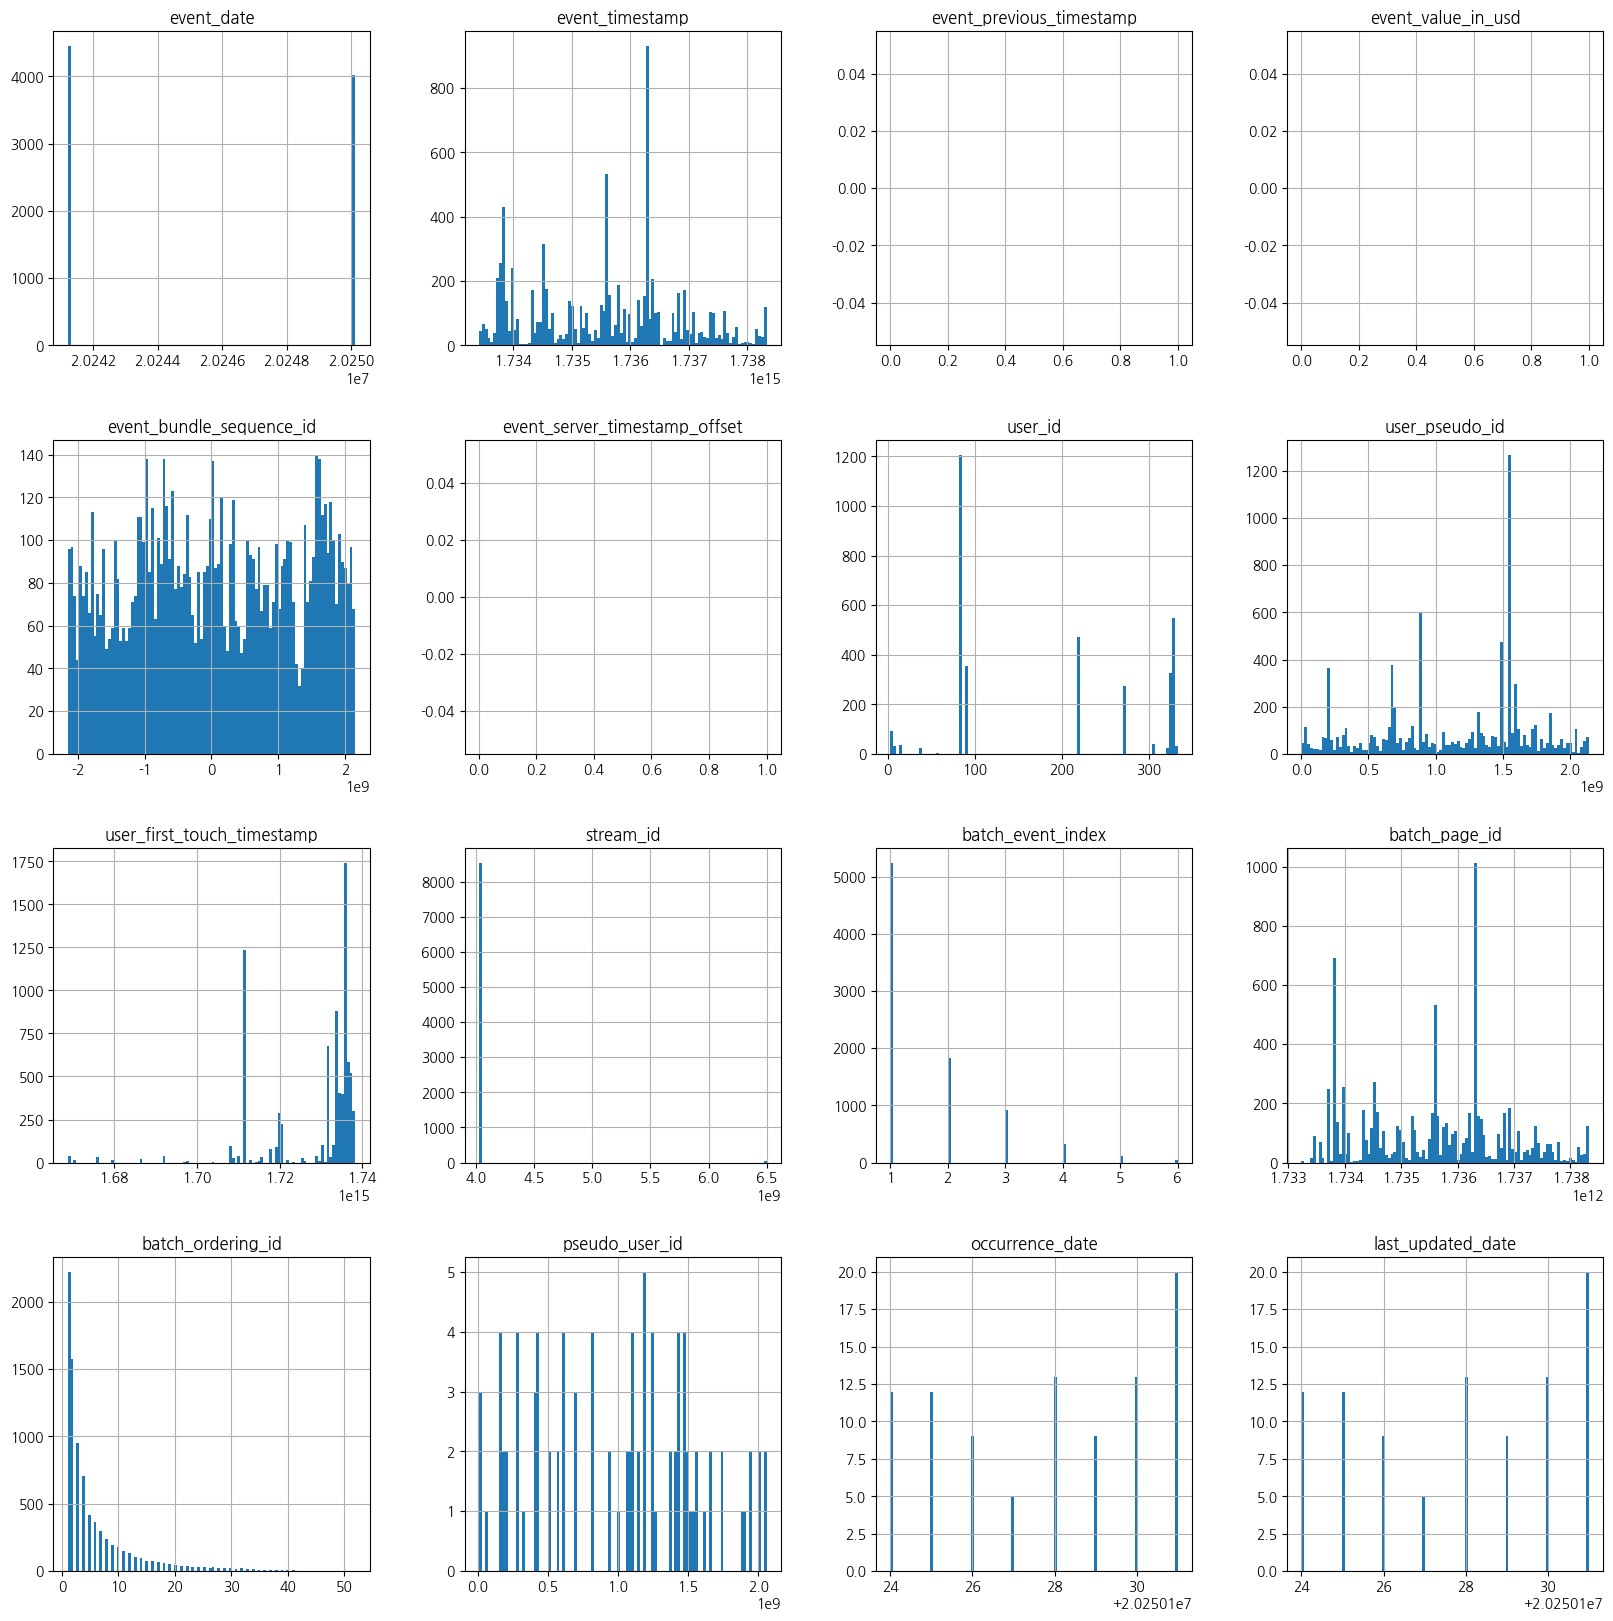

In [9]:
df.hist(bins=100, figsize=(20, 20));

In [10]:
df.describe()

,event_date,event_timestamp,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_pseudo_id,user_first_touch_timestamp,stream_id,batch_event_index,batch_page_id,batch_ordering_id,pseudo_user_id,occurrence_date,last_updated_date
count,8.470000e+03,8.470000e+03,0.0,0.0,8.470000e+03,0.0,3466.000000,8.470000e+03,8.142000e+03,8.563000e+03,8470.000000,8.470000e+03,8470.000000,9.300000e+01,9.300000e+01,9.300000e+01
mean,2.024544e+07,1.735567e+15,NaN,NaN,4.374880e+07,NaN,181.863820,1.131174e+09,1.728275e+15,4.036431e+09,1.628335,1.735564e+12,5.711216,9.970498e+08,2.025013e+07,2.025013e+07
std,4.441132e+03,1.248836e+12,NaN,NaN,1.235279e+09,NaN,111.222992,5.587828e+08,1.197831e+13,1.708268e+08,0.970336,1.250185e+09,7.051065,5.761376e+08,2.511823e+00,2.511823e+00
min,2.024121e+07,1.733416e+15,NaN,NaN,-2.146546e+09,NaN,3.000000,1.862745e+06,1.668755e+15,4.024583e+09,1.000000,1.733232e+12,1.000000,8.944769e+06,2.025012e+07,2.025012e+07
25%,2.024122e+07,1.734507e+15,NaN,NaN,-9.739845e+08,NaN,85.000000,6.774675e+08,1.719800e+15,4.024583e+09,1.000000,1.734507e+12,1.000000,4.336396e+08,2.025012e+07,2.025012e+07
50%,2.024123e+07,1.735615e+15,NaN,NaN,2.029858e+07,NaN,91.000000,1.280190e+09,1.733972e+15,4.024583e+09,1.000000,1.735615e+12,3.000000,1.102203e+09,2.025013e+07,2.025013e+07
75%,2.025011e+07,1.736328e+15,NaN,NaN,1.126588e+09,NaN,324.000000,1.551570e+09,1.736131e+15,4.024583e+09,2.000000,1.736319e+12,7.000000,1.434557e+09,2.025013e+07,2.025013e+07
max,2.025013e+07,1.738327e+15,NaN,NaN,2.147275e+09,NaN,333.000000,2.140954e+09,1.738313e+15,6.499120e+09,6.000000,1.738327e+12,52.000000,2.059630e+09,2.025013e+07,2.025013e+07


In [11]:
df.describe(exclude="number")

,event_name,event_params,privacy_info,user_properties,user_ltv,device,geo,app_info,traffic_source,platform,event_dimensions,ecommerce,items,collected_traffic_source,is_active_user,session_traffic_source_last_click,publisher,user_info,audiences,predictions
count,8470,8470,8563,8563,8563,8563,8563,8470,8470,8470,8470,8470,8470,8470,8470,8470,8470,93,93,93
unique,21,8221,3,6776,72,198,96,1,25,1,1,1,1,73,2,70,1,93,65,1
top,scroll,"{\n ""event_params"": [{\n ""key"": ""term"",\n ...","{\n ""privacy_info"": {\n ""analytics_storage...","{\n ""user_properties"": []\n}","{\n ""user_ltv"": null\n}","{\n ""device"": {\n ""category"": ""desktop"",\n...","{\n ""geo"": {\n ""city"": ""Seoul"",\n ""coun...","{\n ""app_info"": null\n}","{\n ""traffic_source"": {\n ""name"": ""(direct...",WEB,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}","{\n ""user_info"": {\n ""last_active_timestam...","{\n ""audiences"": [{\n ""id"": ""4024582958"",\...","{\n ""predictions"": {\n ""in_app_purchase_sc..."
freq,2156,3,8470,125,8202,859,5823,8470,4929,8470,8470,8470,8470,7741,8418,3764,8470,1,2,93


In [12]:
df['event_timestamp']

,event_timestamp
0,1.735406e+15
1,1.735406e+15
2,1.735475e+15
3,1.735475e+15
4,1.735475e+15
...,...
8558,1.736584e+15
8559,1.736584e+15
8560,1.736584e+15
8561,1.736584e+15


In [13]:
df['event_time'] = pd.to_datetime(df['event_timestamp'])

df['event_date_str'] = df['event_date'].astype(str)

In [14]:
df['event_date']

,event_date
0,20241229.0
1,20241229.0
2,20241229.0
3,20241229.0
4,20241229.0
...,...
8558,20250111.0
8559,20250111.0
8560,20250111.0
8561,20250111.0


In [15]:
df['event_dt'] = pd.to_datetime(df['event_date'].dropna().astype(int).astype(str), format='%Y%m%d')

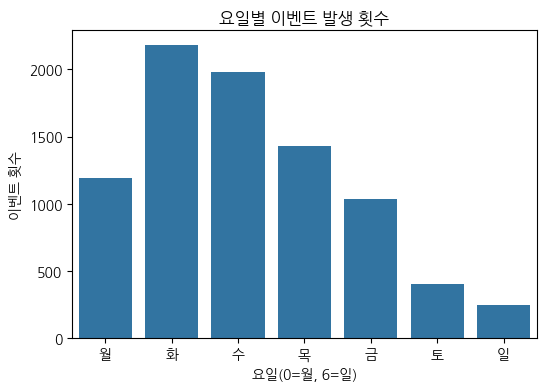

In [16]:
# 변환된 날짜/시간 컬럼을 기반으로 추가 분석(요일, 시각대, 월별 집계 등) 가능
df['event_hour'] = df['event_time'].dt.hour
df['event_dayofweek'] = pd.to_datetime(df['event_dt']).dt.dayofweek

# 예: 요일별 이벤트 수
weekday_counts = df['event_dayofweek'].value_counts().sort_index()
weekday_counts.index = ['월', '화', '수', '목', '금', '토', '일']
plt.figure(figsize=(6, 4))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values)
plt.title("요일별 이벤트 발생 횟수")
plt.xlabel("요일(0=월, 6=일)")
plt.ylabel("이벤트 횟수")
plt.show()

In [17]:
df['event_dt'].describe()

,event_dt
count,8470
mean,2024-12-30 09:23:04.746162688
min,2024-12-06 00:00:00
25%,2024-12-18 00:00:00
50%,2024-12-31 00:00:00
75%,2025-01-08 00:00:00
max,2025-01-31 00:00:00


In [18]:
df['event_dt'].astype(str).value_counts().head()

,count
event_dt,
2025-01-08,1013
2024-12-10,682
2024-12-31,681
2024-12-18,388
2024-12-12,305


<Axes: xlabel='event_dt'>

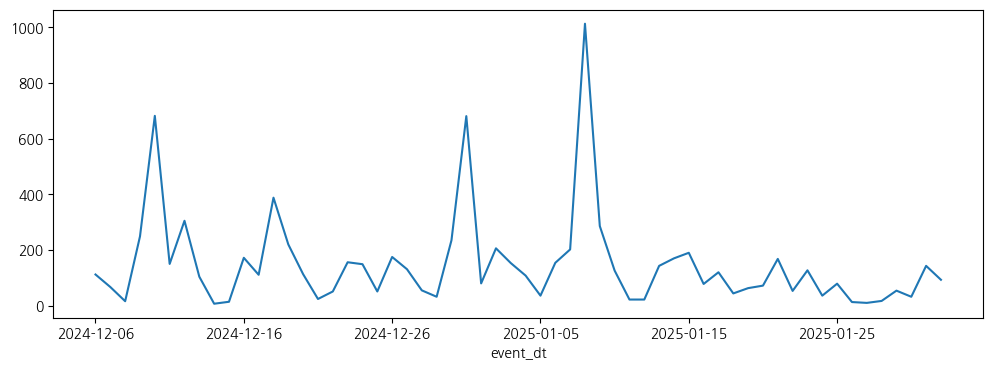

In [19]:
df['event_dt'].astype(str).value_counts().sort_index().plot(figsize=(12, 4))

In [20]:
print("\n[event_name별 빈도수]")
event_counts = df['event_name'].value_counts()
display(event_counts)


[event_name별 빈도수]


,count
event_name,
scroll,2156
page_view,2109
set_user_property,903
session_start,711
user_engagement,577
dashboard_gnb_click,568
dashboard_lnb_click,408
first_visit,392
gnb_click,313


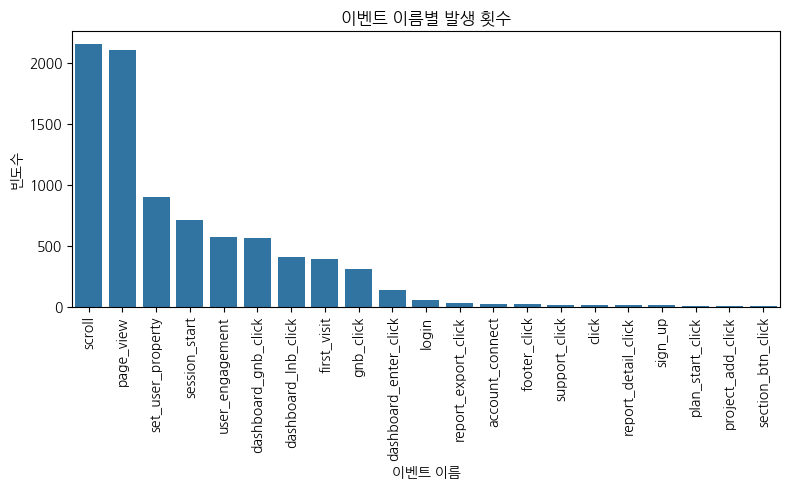

In [21]:
# 막대 그래프로 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x=event_counts.index, y=event_counts.values)
plt.title("이벤트 이름별 발생 횟수")
plt.xlabel("이벤트 이름")
plt.ylabel("빈도수")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 전처리 필요

In [22]:
import json
from pandas import json_normalize

# 1) 문자열 -> 파이썬 dict로 변환
# 2) dict 안의 'device' 키에 해당하는 딕셔너리만 추출
# 3) 그걸 바로 json_normalize로 펼쳐서 데이터프레임화
df_device_flat = (
    df['device']
      .apply(json.loads)              # 문자열 -> dict
      .apply(lambda x: x.get('device', {}))  # "device" 키값 추출
      .pipe(json_normalize)           # dict -> df로 펼치기
)

# device.* 접두사가 붙는 경우가 있다면, 아래처럼 컬럼명 간단히 조정
# df_device_flat.columns = df_device_flat.columns.str.replace('device.', '')

# 4) 기존 df와 좌우로 합치기
df = pd.concat([df, df_device_flat], axis=1)

# 잘 합쳐졌는지 확인
df.head()

,event_date,event_timestamp,event_name,event_params,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_pseudo_id,...,advertising_id,language,is_limited_ad_tracking,time_zone_offset_seconds,browser,browser_version,web_info.browser,web_info.browser_version,web_info.hostname,unified_screen_name
0,20241229.0,1.735406e+15,session_start,"{\n ""event_params"": [{\n ""key"": ""ga_sessio...",NaN,NaN,-1.570617e+09,NaN,NaN,7.997174e+08,...,NaN,ko-kr,No,NaN,NaN,NaN,Safari,17.2,datanugget.io,NaN
1,20241229.0,1.735406e+15,set_user_property,"{\n ""event_params"": [{\n ""key"": ""session_e...",NaN,NaN,-1.570617e+09,NaN,NaN,7.997174e+08,...,NaN,ko-kr,No,NaN,NaN,NaN,Safari,17.2,datanugget.io,NaN
2,20241229.0,1.735475e+15,first_visit,"{\n ""event_params"": [{\n ""key"": ""page_loca...",NaN,NaN,-8.775060e+08,NaN,NaN,1.271534e+09,...,NaN,ko-kr,No,NaN,NaN,NaN,Chrome,131.0.6778.205,datanugget.io,NaN
3,20241229.0,1.735475e+15,session_start,"{\n ""event_params"": [{\n ""key"": ""page_loca...",NaN,NaN,-8.775060e+08,NaN,NaN,1.271534e+09,...,NaN,ko-kr,No,NaN,NaN,NaN,Chrome,131.0.6778.205,datanugget.io,NaN
4,20241229.0,1.735475e+15,set_user_property,"{\n ""event_params"": [{\n ""key"": ""page_loca...",NaN,NaN,-8.775060e+08,NaN,NaN,1.271534e+09,...,NaN,ko-kr,No,NaN,NaN,NaN,Chrome,131.0.6778.205,datanugget.io,NaN


In [23]:
import pandas as pd
import json
from pandas import json_normalize

# 예시: JSON 형태로 파싱해야 할 컬럼들 목록
json_cols = [
    'event_params', 'device', 'geo', 'app_info', 'traffic_source',
    'user_properties', 'user_ltv', 'event_dimensions', 'ecommerce',
    'items', 'collected_traffic_source', 'session_traffic_source_last_click',
    'publisher', 'privacy_info'
]

def parse_json(x):
    """
    JSON 문자열을 dict로 안전하게 변환.
    파싱 실패 시 빈 dict를 반환.
    """
    try:
        return json.loads(x)
    except:
        return {}

# 1) JSON 파싱 & 펼치기
for col in json_cols:
    # 1) 각 컬럼을 dict로 변환
    parsed_series = df[col].apply(parse_json)

    # 2) dict를 펼쳐서 DataFrame으로 만들기
    df_flat = json_normalize(parsed_series)

    # 3) 중복되지 않도록 새로운 컬럼명에 prefix를 추가
    df_flat.columns = [f"{col}.{subcol}" for subcol in df_flat.columns]

    # 4) 기존 df와 좌우로 합치기
    df = pd.concat([df, df_flat], axis=1)

# 2) 원본 JSON 컬럼 제거
df.drop(columns=json_cols, inplace=True)

# 결과 확인
df.head()


,event_date,event_timestamp,event_name,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_pseudo_id,user_first_touch_timestamp,...,session_traffic_source_last_click.session_traffic_source_last_click.cm360_campaign.rendering_id,session_traffic_source_last_click.session_traffic_source_last_click.cm360_campaign.site_id,session_traffic_source_last_click.session_traffic_source_last_click.cm360_campaign.site_name,session_traffic_source_last_click.session_traffic_source_last_click.dv360_campaign,publisher.publisher,privacy_info.privacy_info.analytics_storage,privacy_info.privacy_info.ads_storage,privacy_info.privacy_info.uses_transient_token,privacy_info.privacy_info.is_limited_ad_tracking,privacy_info.privacy_info.is_ads_personalization_allowed
0,20241229.0,1.735406e+15,session_start,NaN,NaN,-1.570617e+09,NaN,NaN,7.997174e+08,1.735183e+15,...,(not set),(not set),(not set),NaN,NaN,NaN,NaN,No,NaN,NaN
1,20241229.0,1.735406e+15,set_user_property,NaN,NaN,-1.570617e+09,NaN,NaN,7.997174e+08,1.735183e+15,...,(not set),(not set),(not set),NaN,NaN,NaN,NaN,No,NaN,NaN
2,20241229.0,1.735475e+15,first_visit,NaN,NaN,-8.775060e+08,NaN,NaN,1.271534e+09,1.735475e+15,...,(not set),(not set),(not set),NaN,NaN,NaN,NaN,No,NaN,NaN
3,20241229.0,1.735475e+15,session_start,NaN,NaN,-8.775060e+08,NaN,NaN,1.271534e+09,1.735475e+15,...,(not set),(not set),(not set),NaN,NaN,NaN,NaN,No,NaN,NaN
4,20241229.0,1.735475e+15,set_user_property,NaN,NaN,-8.775060e+08,NaN,NaN,1.271534e+09,1.735475e+15,...,(not set),(not set),(not set),NaN,NaN,NaN,NaN,No,NaN,NaN


In [24]:
df.shape

(8563, 145)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8563 entries, 0 to 8562
Columns: 145 entries, event_date to privacy_info.privacy_info.is_ads_personalization_allowed
dtypes: datetime64[ns](2), float64(46), int64(1), object(96)
memory usage: 9.5+ MB


In [26]:
df.columns

Index(['event_date', 'event_timestamp', 'event_name',
       'event_previous_timestamp', 'event_value_in_usd',
       'event_bundle_sequence_id', 'event_server_timestamp_offset', 'user_id',
       'user_pseudo_id', 'user_first_touch_timestamp',
       ...
       'session_traffic_source_last_click.session_traffic_source_last_click.cm360_campaign.rendering_id',
       'session_traffic_source_last_click.session_traffic_source_last_click.cm360_campaign.site_id',
       'session_traffic_source_last_click.session_traffic_source_last_click.cm360_campaign.site_name',
       'session_traffic_source_last_click.session_traffic_source_last_click.dv360_campaign',
       'publisher.publisher', 'privacy_info.privacy_info.analytics_storage',
       'privacy_info.privacy_info.ads_storage',
       'privacy_info.privacy_info.uses_transient_token',
       'privacy_info.privacy_info.is_limited_ad_tracking',
       'privacy_info.privacy_info.is_ads_personalization_allowed'],
      dtype='object', length=145

In [ ]:
# df[json_cols] = df[json_cols].astype('string')
# df[json_cols].info()

In [27]:
df

,event_date,event_timestamp,event_name,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_pseudo_id,user_first_touch_timestamp,...,session_traffic_source_last_click.session_traffic_source_last_click.cm360_campaign.rendering_id,session_traffic_source_last_click.session_traffic_source_last_click.cm360_campaign.site_id,session_traffic_source_last_click.session_traffic_source_last_click.cm360_campaign.site_name,session_traffic_source_last_click.session_traffic_source_last_click.dv360_campaign,publisher.publisher,privacy_info.privacy_info.analytics_storage,privacy_info.privacy_info.ads_storage,privacy_info.privacy_info.uses_transient_token,privacy_info.privacy_info.is_limited_ad_tracking,privacy_info.privacy_info.is_ads_personalization_allowed
0,20241229.0,1.735406e+15,session_start,NaN,NaN,-1.570617e+09,NaN,NaN,7.997174e+08,1.735183e+15,...,(not set),(not set),(not set),NaN,NaN,NaN,NaN,No,NaN,NaN
1,20241229.0,1.735406e+15,set_user_property,NaN,NaN,-1.570617e+09,NaN,NaN,7.997174e+08,1.735183e+15,...,(not set),(not set),(not set),NaN,NaN,NaN,NaN,No,NaN,NaN
2,20241229.0,1.735475e+15,first_visit,NaN,NaN,-8.775060e+08,NaN,NaN,1.271534e+09,1.735475e+15,...,(not set),(not set),(not set),NaN,NaN,NaN,NaN,No,NaN,NaN
3,20241229.0,1.735475e+15,session_start,NaN,NaN,-8.775060e+08,NaN,NaN,1.271534e+09,1.735475e+15,...,(not set),(not set),(not set),NaN,NaN,NaN,NaN,No,NaN,NaN
4,20241229.0,1.735475e+15,set_user_property,NaN,NaN,-8.775060e+08,NaN,NaN,1.271534e+09,1.735475e+15,...,(not set),(not set),(not set),NaN,NaN,NaN,NaN,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8558,20250111.0,1.736584e+15,page_view,NaN,NaN,2.705099e+07,NaN,NaN,1.637953e+09,1.736584e+15,...,(not set),(not set),(not set),NaN,NaN,NaN,NaN,No,NaN,NaN
8559,20250111.0,1.736584e+15,page_view,NaN,NaN,2.705099e+07,NaN,NaN,1.637953e+09,1.736584e+15,...,(not set),(not set),(not set),NaN,NaN,NaN,NaN,No,NaN,NaN
8560,20250111.0,1.736584e+15,first_visit,NaN,NaN,-4.644725e+07,NaN,NaN,1.637953e+09,1.736584e+15,...,(not set),(not set),(not set),NaN,NaN,NaN,NaN,No,NaN,NaN
8561,20250111.0,1.736584e+15,session_start,NaN,NaN,-4.644725e+07,NaN,NaN,1.637953e+09,1.736584e+15,...,(not set),(not set),(not set),NaN,NaN,NaN,NaN,No,NaN,NaN


In [28]:
# 모든 범주형(문자형, bool) 컬럼 추출
cat_cols = df.select_dtypes(include=['object']).columns
# 점(.)이 들어있는 컬럼을 제외
cat_cols = [col for col in cat_cols if '.' not in col]
cat_cols

['event_name',
 'platform',
 'is_active_user',
 'user_info',
 'audiences',
 'predictions',
 'event_date_str',
 'category',
 'mobile_brand_name',
 'mobile_model_name',
 'mobile_marketing_name',
 'mobile_os_hardware_model',
 'operating_system',
 'operating_system_version',
 'language',
 'is_limited_ad_tracking',
 'unified_screen_name']

## 이벤트 분석

In [29]:
# df['event_name']

## 모든 범주 데이터 분석

In [30]:
# 모든 범주형(문자형, bool) 컬럼 추출
for col in cat_cols:
    print(f"[{col}] - value_counts():")
    if df[col].nunique(dropna=False) <= 50:
        print(df[col].value_counts(dropna=False))
        print("-" * 40)  # 구분선

[event_name] - value_counts():
event_name
scroll                   2156
page_view                2109
set_user_property         903
session_start             711
user_engagement           577
dashboard_gnb_click       568
dashboard_lnb_click       408
first_visit               392
gnb_click                 313
dashboard_enter_click     135
NaN                        93
login                      52
report_export_click        29
account_connect            21
footer_click               19
support_click              18
click                      16
report_detail_click        15
sign_up                    12
plan_start_click            8
project_add_click           5
section_btn_click           3
Name: count, dtype: int64
----------------------------------------
[platform] - value_counts():
platform
WEB    8470
NaN      93
Name: count, dtype: int64
----------------------------------------
[is_active_user] - value_counts():
is_active_user
True     8418
NaN        93
False      52
Name: coun

In [31]:
# 모든 범주형(문자형, bool) 컬럼 추출
for col in cat_cols:
    print(f"[{col}] - value_counts():")
    if df[col].nunique(dropna=False) <= 50:
        print(df[col].value_counts(normalize=True, dropna=False))
        print("-" * 40)  # 구분선

[event_name] - value_counts():
event_name
scroll                   0.251781
page_view                0.246292
set_user_property        0.105454
session_start            0.083032
user_engagement          0.067383
dashboard_gnb_click      0.066332
dashboard_lnb_click      0.047647
first_visit              0.045778
gnb_click                0.036553
dashboard_enter_click    0.015766
NaN                      0.010861
login                    0.006073
report_export_click      0.003387
account_connect          0.002452
footer_click             0.002219
support_click            0.002102
click                    0.001869
report_detail_click      0.001752
sign_up                  0.001401
plan_start_click         0.000934
project_add_click        0.000584
section_btn_click        0.000350
Name: proportion, dtype: float64
----------------------------------------
[platform] - value_counts():
platform
WEB    0.989139
NaN    0.010861
Name: proportion, dtype: float64
---------------------------------

In [ ]:
# dot_cols = [col for col in df.columns if '.' in col]
# print(dot_cols)

In [32]:
df['user_properties.user_properties'].loc[2]

[{'key': 'user_type',
  'value': {'string_value': '일반 회원',
   'int_value': None,
   'float_value': None,
   'double_value': None,
   'set_timestamp_micros': '1735475147723264'}},
 {'key': 'user_group',
  'value': {'string_value': '회원',
   'int_value': None,
   'float_value': None,
   'double_value': None,
   'set_timestamp_micros': '1735475147723264'}}]

	user_properties.user_properties
8	[{'key': 'na_body_type', 'value': {'string_value': '모래시계형', 'int_value': None, 'float_value': None, 'double_value': None, 'set_timestamp_micros': '1730298835861000'}}, {'key': 'ga_session_number', 'value': {'string_value': None, 'int_value': '172', 'float_value': None, 'double_value': None, 'set_timestamp_micros': '1731485276933000'}}, {'key': 'na_gender', 'value': {'string_value': '여자', 'int_value': None, 'float_value': None, 'double_value': None, 'set_timestamp_micros': '1730298835855000'}}, {'key': 'na_shoulder', 'value': {'string_value': '크다', 'int_value': None, 'float_value': None, 'double_value': None, 'set_timestamp_micros': '1730298835858000'}}, {'key': 'ga_session_id', 'value': {'string_value': None, 'int_value': '1731485276', 'float_value': None, 'double_value': None, 'set_timestamp_micros': '1731485276933000'}}, {'key': 'na_top', 'value': {'string_value': '미설정', 'int_value': None, 'float_value': None, 'double_value': None, 'set_timestamp_micros': '1730298835859000'}}, {'key': 'na_waist', 'value': {'string_value': '크다', 'int_value': None, 'float_value': None, 'double_value': None, 'set_timestamp_micros': '1730298835858000'}}, {'key': 'na_job', 'value': {'string_value': '학생', 'int_value': None, 'float_value': None, 'double_value': None, 'set_timestamp_micros': '1730298835861000'}}, {'key': 'na_thigh', 'value': {'string_value': '크다', 'int_value': None, 'float_value': None, 'double_value': None, 'set_timestamp_micros': '1730298835858000'}}, {'key': 'na_age', 'value': {'string_value': '21', 'int_value': None, 'float_value': None, 'double_value': None, 'set_timestamp_micros': '1730298835857000'}}, {'key': 'na_bottom', 'value': {'string_value': '미설정', 'int_value': None, 'float_value': None, 'double_value': None, 'set_timestamp_micros': '1730298835861000'}}, {'key': 'na_skin_type', 'value': {'string_value': '가을', 'int_value': None, 'float_value': None, 'double_value': None, 'set_timestamp_micros': '1730298835857000'}}, {'key': 'na_middle', 'value': {'string_value': '크다', 'int_value': None, 'float_value': None, 'double_value': None, 'set_timestamp_micros': '1730298835859000'}}, {'key': 'na_height', 'value': {'string_value': '160', 'int_value': None, 'float_value': None, 'double_value': None, 'set_timestamp_micros': '1730298835856000'}}, {'key': 'na_face_type', 'value': {'string_value': '사각형', 'int_value': None, 'float_value': None, 'double_value': None, 'set_timestamp_micros': '1730298835857000'}}, {'key': 'first_open_time', 'value': {'string_value': None, 'int_value': '1717070400000', 'float_value': None, 'double_value': None, 'set_timestamp_micros': '1717068513956000'}}]

In [33]:
df.to_csv('preprocessing_ga.csv', index=False)

In [34]:

# 우선 user_pseudo_id, event_timestamp 순으로 정렬 (이벤트 시간 순서대로 분석)
df_sorted = df.sort_values(by=["user_pseudo_id", "event_timestamp"], ascending=True).reset_index(drop=True)

In [ ]:
# # 각 user_pseudo_id가 어떤 이벤트를 어떤 순서로 수행했는지
# user_event_sequence = (
#     df_sorted
#     .groupby("user_pseudo_id")["event_name"]
#     .apply(list)
# )

# # 예시 출력
# for user, events in user_event_sequence.items():
#     print(f"User: {user}")
#     print(f"Event Flow: {events}")
#     print("----")


## 아하모먼트
* target_event = 'session_start' 로 구해보기

In [35]:
# --------------------------------------------------
# (0) 예시: df를 이미 가지고 있다고 가정
#     실제로는 df = pd.read_csv('...') 또는 DB에서 불러오는 방식
# --------------------------------------------------

# --------------------------------------------------
# (1) 이벤트명 선정: 'session_start'가 존재하는지 확인
# --------------------------------------------------
# 만약 'session_start'가 없다면, df['event_name'].unique() 로 어떤 이벤트가 있는지 확인 후 대체
target_event = 'session_start'

if target_event not in df['event_name'].unique():
    print(f"주의: '{target_event}' 이벤트가 데이터에 존재하지 않습니다. "
           "df['event_name'].unique()로 어떤 이벤트가 있는지 확인 후 적절히 변경하세요.")

# --------------------------------------------------
# (2) 타임스탬프 변환 (GA4/Firebase는 주로 마이크로초 단위)
# --------------------------------------------------
df['event_time'] = pd.to_datetime(df['event_timestamp'], unit='us', utc=True)
df['first_touch_time'] = pd.to_datetime(df['user_first_touch_timestamp'], unit='us', utc=True)

# --------------------------------------------------
# (3) 'session_start' 이벤트만 필터링 -> 사용자별 7일 내 발생 횟수 세기
# --------------------------------------------------
target_df = df[df['event_name'] == target_event].copy()

if target_df.empty:
    print(f"주의: {target_event} 이벤트가 존재하지 않아 분석 불가")
    # 여기서 종료해도 되지만, 일단 예시에서는 진행

# '가입 후 며칠째' 계산
target_df['days_since_signup'] = (
    target_df['event_time'] - target_df['first_touch_time']
).dt.total_seconds() / 86400  # 일 단위

# 7일 이내 발생
target_within_7days = target_df[target_df['days_since_signup'] <= 7]

# 사용자별 이벤트 횟수
user_target_count = (
    target_within_7days
    .groupby('user_pseudo_id')['event_name']
    .count()
    .reset_index()
)
user_target_count.columns = ['user_pseudo_id', 'target_count_7days']

# 임계치(threshold): 3회 (서비스 특성에 따라 2, 5 등 다른 값도 시도 가능)
threshold = 3
user_target_count['is_aha_user'] = user_target_count['target_count_7days'] >= threshold

print(f"7일 내 '{target_event}' {threshold}회 이상 달성 사용자 수:", user_target_count['is_aha_user'].sum())
print(f"7일 내 '{target_event}' {threshold}회 미만 사용자 수:",
      len(user_target_count) - user_target_count['is_aha_user'].sum())

# --------------------------------------------------
# (4) 14일차 리텐션 계산
#     - 14일 이후(>14)에 ANY 이벤트가 1개 이상 있으면 재방문=True
# --------------------------------------------------
df['days_since_signup'] = (
    df['event_time'] - df['first_touch_time']
).dt.total_seconds() / 86400

df_14days_later = df[df['days_since_signup'] > 14]

if df_14days_later.empty:
    print("주의: 14일 이후 발생한 이벤트가 없습니다. (데이터 기간이 14일 미만일 수 있음)")

retention_14days = (
    df_14days_later
    .groupby('user_pseudo_id')['event_name']
    .count()
    .reset_index()
)
retention_14days.columns = ['user_pseudo_id', 'events_after_14days']
retention_14days['is_retained_14days'] = retention_14days['events_after_14days'] > 0

# --------------------------------------------------
# (5) user_target_count + retention_14days 병합
# --------------------------------------------------
result = pd.merge(
    user_target_count,
    retention_14days,
    on='user_pseudo_id',
    how='left'
)

# 14일 이후 이벤트가 없는 사용자 -> 결측 처리
result['events_after_14days'] = result['events_after_14days'].fillna(0)
result['is_retained_14days'] = result['is_retained_14days'].fillna(False)

# --------------------------------------------------
# (6) 아하 그룹 vs 비아하 그룹 리텐션 비교
# --------------------------------------------------
aha_group = result[result['is_aha_user'] == True]
non_aha_group = result[result['is_aha_user'] == False]

if aha_group.empty:
    print(f"주의: Aha 그룹(7일 내 '{target_event}' {threshold}회 이상) 사용자가 없습니다.")
if non_aha_group.empty:
    print(f"주의: 비 Aha 그룹(7일 내 '{target_event}' {threshold}회 미만) 사용자가 없습니다.")

if not aha_group.empty:
    aha_retention_rate = aha_group['is_retained_14days'].mean()
else:
    aha_retention_rate = np.nan

if not non_aha_group.empty:
    non_aha_retention_rate = non_aha_group['is_retained_14days'].mean()
else:
    non_aha_retention_rate = np.nan

print("--------------------------------------------------")
print(f"Aha 그룹(7일 내 '{target_event}' {threshold}회 이상) 14일차 리텐션:", aha_retention_rate)
print(f"비 Aha 그룹(7일 내 '{target_event}' {threshold}회 미만) 14일차 리텐션:", non_aha_retention_rate)
print("--------------------------------------------------")


7일 내 'session_start' 3회 이상 달성 사용자 수: 13
7일 내 'session_start' 3회 미만 사용자 수: 380
--------------------------------------------------
Aha 그룹(7일 내 'session_start' 3회 이상) 14일차 리텐션: 0.07692307692307693
비 Aha 그룹(7일 내 'session_start' 3회 미만) 14일차 리텐션: 0.007894736842105263
--------------------------------------------------


<ipython-input-35-92ad9df6071c>:90: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result['is_retained_14days'] = result['is_retained_14days'].fillna(False)


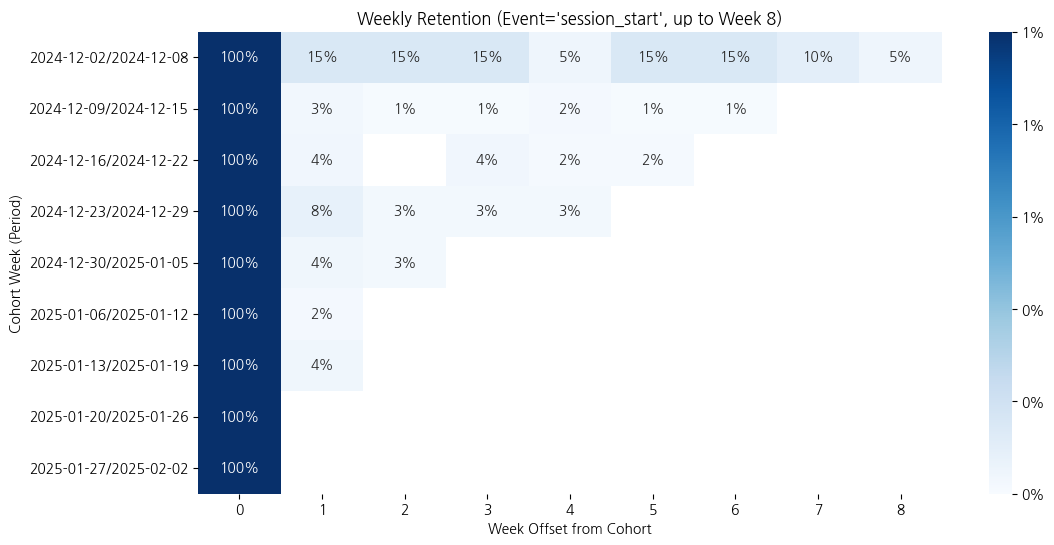


=== Weekly Retention Pivot Table ===
week_offset              0         1         2         3         4         5  \
cohort_week_period                                                             
2024-12-02/2024-12-08  1.0  0.150000  0.150000  0.150000  0.050000  0.150000   
2024-12-09/2024-12-15  1.0  0.033333  0.011111  0.011111  0.022222  0.011111   
2024-12-16/2024-12-22  1.0  0.038462       NaN  0.038462  0.019231  0.019231   
2024-12-23/2024-12-29  1.0  0.081081  0.027027  0.027027  0.027027       NaN   
2024-12-30/2025-01-05  1.0  0.039474  0.026316       NaN       NaN       NaN   
2025-01-06/2025-01-12  1.0  0.019608       NaN       NaN       NaN       NaN   
2025-01-13/2025-01-19  1.0  0.041667       NaN       NaN       NaN       NaN   
2025-01-20/2025-01-26  1.0       NaN       NaN       NaN       NaN       NaN   
2025-01-27/2025-02-02  1.0       NaN       NaN       NaN       NaN       NaN   

week_offset                   6    7     8  
cohort_week_period                  

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_timestamp(df, timestamp_col='event_timestamp'):
    """
    event_timestamp를 datetime으로 변환.
    GA4/Firebase에서는 마이크로초(us) 단위를 쓰는 경우가 많으므로
    필요에 따라 unit='ms', unit='s' 등으로 바꿔야 할 수도 있음.
    """
    if not pd.api.types.is_datetime64_any_dtype(df[timestamp_col]):
        df[timestamp_col] = pd.to_datetime(df[timestamp_col], unit='us', errors='coerce')
    return df

def compute_weekly_retention_heatmap(
    df,
    user_col='user_pseudo_id',
    ts_col='event_timestamp',
    event_name_col='event_name',
    target_event='session_start',
    max_week_offset=8
):
    """
    session_start 이벤트를 기준으로 주(Week) 단위 코호트 리텐션을 계산하고 히트맵으로 시각화.

    1) user별 최초 session_start 발생 '주'(cohort_week)를 찾음.
    2) 각 이벤트 발생 주(event_week)를 구하고,
       week_offset = (event_week - cohort_week).
    3) (cohort_week, week_offset)별 unique users 수 -> (재방문 유저 수).
    4) retention = (재방문 유저 수) / (cohort_size).
    5) pivot 테이블 -> Seaborn heatmap 그리기.

    Parameters
    ----------
    df : pd.DataFrame
        이벤트 로그 데이터.
    user_col : str
        유저 식별 컬럼 (기본 'user_pseudo_id').
    ts_col : str
        타임스탬프 컬럼 (마이크로초 us 단위 가정).
    event_name_col : str
        이벤트명 컬럼 (기본 'event_name').
    target_event : str
        리텐션 측정 기준 이벤트명 (기본 'session_start').
    max_week_offset : int
        최대 몇 주까지 리텐션을 볼지 (기본 8주).

    Returns
    -------
    pivot_df : pd.DataFrame
        코호트(주) x Week Offset의 리텐션 테이블.
    """

    df = df.copy()
    # 1) 타임스탬프 -> datetime 변환
    df = preprocess_timestamp(df, ts_col)

    # 2) session_start 이벤트만 필터
    df_target = df[df[event_name_col] == target_event].copy()
    if df_target.empty:
        print(f"데이터 내 '{target_event}' 이벤트가 없습니다. 리텐션 계산 불가.")
        return None

    # 3) 이벤트 발생 주 계산 (to_period('W'))
    #    to_period('W')는 주 단위 Period 객체를 생성. 월요일 시작 or 일요일 시작이 필요한 경우 커스텀 가능
    #    예: to_period('W-SUN') => 일요일 기준 주차, 'W-MON' => 월요일 기준 주차
    df_target['event_week_period'] = df_target[ts_col].dt.to_period('W-SUN')
    # Cohort Week = 유저별 첫 session_start 주 (최소 event_week_period)
    first_session_week = (
        df_target.groupby(user_col)['event_week_period'].min().rename('cohort_week_period')
    )
    df_target = df_target.merge(first_session_week, on=user_col, how='left')

    # 4) week_offset = (event_week_period - cohort_week_period)
    #    Period subtraction -> 결과는 <Integer> (주 차이)
    df_target['week_offset'] = (
        df_target['event_week_period'].astype(int) - df_target['cohort_week_period'].astype(int)
    )

    # 5) max_week_offset 이하만 필터
    df_target = df_target[df_target['week_offset'] <= max_week_offset]

    # 6) 각 코호트별(week_offset=0) 유저수 = cohort_size
    #    (cohort_week_period, day_offset=0)에서 unique user 수
    cohort_sizes = (
        df_target[df_target['week_offset'] == 0]
        .groupby('cohort_week_period')[user_col].nunique()
        .rename('cohort_size')
    )

    # 7) (cohort_week_period, week_offset)별 유저 수(재방문 유저 수)
    cohort_active = (
        df_target.groupby(['cohort_week_period', 'week_offset'])[user_col]
        .nunique()
        .reset_index(name='active_users')
    )

    # 8) join하여 cohort_size와 비교 -> retention 계산
    cohort_active = cohort_active.merge(cohort_sizes, on='cohort_week_period', how='left')
    cohort_active['retention'] = cohort_active['active_users'] / cohort_active['cohort_size']

    # 9) 피벗 테이블: index=cohort_week_period, columns=week_offset, values=retention
    pivot_df = cohort_active.pivot(index='cohort_week_period', columns='week_offset', values='retention')

    # index(코호트 주차) 정렬
    pivot_df = pivot_df.sort_index()
    # columns(week_offset) 정렬
    pivot_df = pivot_df.reindex(sorted(pivot_df.columns), axis=1)

    # (선택) 코호트 주차를 문자열로 변환
    #   주차 Period -> 'YYYY-MM-DD/XXXX-XX-XX' 등으로 표시될 수 있음
    pivot_df.index = pivot_df.index.astype(str)

    # 10) 히트맵 시각화
    plt.figure(figsize=(12, 6))
    sns.heatmap(
        pivot_df,
        annot=True,          # 각 칸에 숫자 표시
        fmt='.0%',           # 퍼센트 형태(0.xx -> xx%)
        cmap='Blues',        # 컬러맵
        vmin=0, vmax=1,      # 0% ~ 100%
        cbar_kws={'format': '%.0f%%'}
    )
    plt.title(f"Weekly Retention (Event='{target_event}', up to Week {max_week_offset})")
    plt.xlabel("Week Offset from Cohort")
    plt.ylabel("Cohort Week (Period)")
    plt.yticks(rotation=0)  # Cohort 주차 라벨 가로 표시
    plt.show()

    return pivot_df


# ---------------------------------------
# 예시 사용 (이미 df를 가지고 있다고 가정)
# ---------------------------------------
if __name__ == "__main__":
    # df: GA4 형태의 이벤트 로그 데이터 (pandas DataFrame)
    # df.columns 예: [event_timestamp, event_name, user_pseudo_id, ... ]

    retention_pivot = compute_weekly_retention_heatmap(df, max_week_offset=8)
    if retention_pivot is not None:
        print("\n=== Weekly Retention Pivot Table ===")
        print(retention_pivot.head(10))


## 리텐션

In [37]:
import pandas as pd
import numpy as np
from datetime import datetime
import json
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

def load_and_preprocess_data(file_path):
    """
    데이터 로드 및 전처리
    """
    # CSV 파일 로드
    df = pd.read_csv(file_path, encoding='iso-8859-1')

    # timestamp를 datetime으로 변환
    df['event_timestamp'] = pd.to_datetime(df['event_timestamp'], unit='ms')
    df['user_first_touch_timestamp'] = pd.to_datetime(df['user_first_touch_timestamp'], unit='ms')

    return df

def analyze_user_journey(df):
    """
    사용자 여정 분석
    """
    # 사용자별 이벤트 시퀀스 분석
    user_sequences = df.groupby('user_pseudo_id').agg({
        'event_name': lambda x: list(x),
        'event_timestamp': lambda x: list(x)
    }).reset_index()

    # 시퀀스 정렬
    for idx, row in user_sequences.iterrows():
        events = [(e, t) for e, t in zip(row['event_name'], row['event_timestamp'])]
        events.sort(key=lambda x: x[1])
        user_sequences.at[idx, 'event_sequence'] = [e[0] for e in events]

    return user_sequences

def find_aha_moments(df):
    """
    아하모먼트 후보 식별
    """
    # 이벤트별 사용자 참여도
    event_engagement = df.groupby('event_name').agg({
        'user_pseudo_id': 'nunique',
        'event_timestamp': 'count'
    }).reset_index()
    event_engagement.columns = ['event_name', 'unique_users', 'total_occurrences']
    event_engagement['avg_per_user'] = event_engagement['total_occurrences'] / event_engagement['unique_users']

    return event_engagement

def analyze_user_retention(df):
    """
    사용자 리텐션 분석
    """
    # 첫 방문일 기준 리텐션 계산
    df['first_visit_date'] = df.groupby('user_pseudo_id')['event_timestamp'].transform('min').dt.date
    df['visit_date'] = df['event_timestamp'].dt.date
    df['days_since_first_visit'] = (df['visit_date'] - df['first_visit_date']).dt.days

    retention_matrix = pd.crosstab(df['first_visit_date'], df['days_since_first_visit'])

    return retention_matrix

def analyze_conversion_funnel(df, event_sequence):
    """
    전환 퍼널 분석
    """
    funnel_data = []
    total_users = df['user_pseudo_id'].nunique()

    for idx, event in enumerate(event_sequence):
        users_reached = df[df['event_name'] == event]['user_pseudo_id'].nunique()
        conversion_rate = (users_reached / total_users) * 100
        funnel_data.append({
            'step': idx + 1,
            'event': event,
            'users': users_reached,
            'conversion_rate': conversion_rate
        })

    return pd.DataFrame(funnel_data)

def identify_key_features(df):
    """
    핵심 기능 식별
    """
    # 이벤트 파라미터 분석 (event_params가 JSON 형식일 경우)
    def parse_event_params(params_str):
        try:
            return json.loads(params_str)
        except:
            return {}

    if 'event_params' in df.columns:
        df['parsed_params'] = df['event_params'].apply(parse_event_params)
        # 파라미터별 사용 빈도 분석
        feature_usage = defaultdict(int)
        for params in df['parsed_params']:
            for param in params:
                feature_usage[param['name']] += 1

        return pd.DataFrame(feature_usage.items(), columns=['feature', 'usage_count'])

    return pd.DataFrame()

def main():
    # 데이터 파일 경로
    file_path = 'ga_innercircle_8563.csv'

    # 데이터 로드
    df = load_and_preprocess_data(file_path)

    # 1. 사용자 여정 분석
    user_journeys = analyze_user_journey(df)
    print("\n=== 가장 일반적인 사용자 여정 패턴 ===")
    print(user_journeys['event_sequence'].value_counts().head())

    # 2. 아하모먼트 후보 식별
    aha_moments = find_aha_moments(df)
    print("\n=== 잠재적 아하모먼트 ===")
    print(aha_moments.sort_values('avg_per_user', ascending=False).head())

    # 3. 리텐션 분석
    retention = analyze_user_retention(df)
    print("\n=== 리텐션 매트릭스 ===")
    print(retention.head())

    # 4. 전환 퍼널 분석
    key_events = ['page_view', 'sign_up', 'subscription_start', 'payment']  # 예시 이벤트
    funnel = analyze_conversion_funnel(df, key_events)
    print("\n=== 전환 퍼널 ===")
    print(funnel)

    # 5. 핵심 기능 분석
    key_features = identify_key_features(df)
    print("\n=== 핵심 기능 사용 현황 ===")
    print(key_features.sort_values('usage_count', ascending=False).head())

def visualize_insights(df):
    """
    인사이트 시각화
    """
    plt.figure(figsize=(15, 10))

    # 1. 이벤트 분포
    plt.subplot(2, 2, 1)
    event_counts = df['event_name'].value_counts()
    sns.barplot(x=event_counts.head(), y=event_counts.head().index)
    plt.title('Top Events Distribution')

    # 2. 시간대별 사용자 활동
    plt.subplot(2, 2, 2)
    df['hour'] = df['event_timestamp'].dt.hour
    hourly_activity = df['hour'].value_counts().sort_index()
    plt.plot(hourly_activity.index, hourly_activity.values)
    plt.title('User Activity by Hour')

    # 3. 리텐션 히트맵
    plt.subplot(2, 2, 3)
    retention = analyze_user_retention(df)
    sns.heatmap(retention.iloc[:10, :10], cmap='YlOrRd')
    plt.title('Retention Heatmap')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

OutOfBoundsDatetime: cannot convert input with unit 'ms'

In [38]:
import pandas as pd
import numpy as np
from datetime import datetime
import json
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

def load_and_preprocess_data(file_path):
    """
    데이터 로드 및 전처리
    """
    # CSV 파일 로드
    df = pd.read_csv(file_path, encoding='iso-8859-1')

    # timestamp 처리를 안전하게 수정
    def safe_timestamp_convert(x):
        try:
            if pd.isna(x):
                return pd.NaT
            # 마이크로초 단위로 가정하고 초 단위로 변환
            return pd.to_datetime(float(x) / 1000000, unit='s')
        except (ValueError, OutOfBoundsDatetime):
            return pd.NaT

    # timestamp 컬럼들 변환
    timestamp_columns = ['event_timestamp', 'user_first_touch_timestamp', 'event_previous_timestamp']
    for col in timestamp_columns:
        if col in df.columns:
            df[col] = df[col].apply(safe_timestamp_convert)

    return df

def analyze_user_journey(df):
    """
    사용자 여정 분석
    """
    # 사용자별 이벤트 시퀀스 및 기본 통계
    user_stats = df.groupby('user_pseudo_id').agg({
        'event_name': ['count', list],
        'event_timestamp': ['min', 'max']
    }).reset_index()

    user_stats.columns = ['user_pseudo_id', 'total_events', 'event_sequence', 'first_seen', 'last_seen']

    # 가장 흔한 이벤트 시퀀스 패턴 (처음 3개 이벤트만)
    def get_first_three_events(events):
        return ' > '.join(events[:3]) if len(events) >= 3 else ' > '.join(events)

    user_stats['initial_pattern'] = user_stats['event_sequence'].apply(get_first_three_events)

    return user_stats

def find_aha_moments(df):
    """
    아하모먼트 후보 식별
    """
    # 이벤트별 기본 지표
    event_metrics = df.groupby('event_name').agg({
        'user_pseudo_id': ['nunique', 'count']
    }).reset_index()

    event_metrics.columns = ['event_name', 'unique_users', 'total_occurrences']
    event_metrics['avg_per_user'] = event_metrics['total_occurrences'] / event_metrics['unique_users']

    # 이벤트 발생 시점 분석
    event_timing = df.groupby(['user_pseudo_id', 'event_name'])['event_timestamp'].min().reset_index()
    event_timing['time_from_first'] = event_timing.groupby('user_pseudo_id')['event_timestamp'].transform(lambda x: x - x.min())

    # 각 이벤트별 첫 발생 시점 평균
    avg_first_occurrence = event_timing.groupby('event_name')['time_from_first'].mean()
    event_metrics['avg_first_occurrence_days'] = event_metrics['event_name'].map(
        lambda x: avg_first_occurrence.get(x, pd.Timedelta(0)).total_seconds() / 86400
    )

    return event_metrics

def analyze_event_flow(df):
    """
    이벤트 흐름 분석
    """
    # 사용자별 이벤트 순서 분석
    event_flows = []
    for user_id, user_data in df.groupby('user_pseudo_id'):
        sorted_events = user_data.sort_values('event_timestamp')

        # 연속된 이벤트 쌍 추출
        for i in range(len(sorted_events) - 1):
            current_event = sorted_events.iloc[i]['event_name']
            next_event = sorted_events.iloc[i + 1]['event_name']
            event_flows.append((current_event, next_event))

    # 이벤트 전환 매트릭스 생성
    flow_df = pd.DataFrame(event_flows, columns=['current_event', 'next_event'])
    transition_matrix = pd.crosstab(flow_df['current_event'], flow_df['next_event'])

    return transition_matrix

def analyze_feature_usage(df):
    """
    기능 사용 패턴 분석
    """
    # 이벤트별 사용자 분포
    feature_usage = df.groupby('event_name').agg({
        'user_pseudo_id': 'nunique',
        'event_timestamp': 'count'
    }).reset_index()

    feature_usage.columns = ['feature', 'unique_users', 'total_uses']
    feature_usage['avg_uses_per_user'] = feature_usage['total_uses'] / feature_usage['unique_users']

    # 사용자 세그먼트 분석
    user_segments = df.groupby('user_pseudo_id').agg({
        'event_name': 'count'
    }).reset_index()

    user_segments['usage_level'] = pd.qcut(user_segments['event_name'],
                                         q=3,
                                         labels=['Low', 'Medium', 'High'])

    return feature_usage, user_segments

def main():
    """
    메인 분석 실행
    """
    # 데이터 로드
    file_path = 'ga_innercircle_8563.csv'
    print("데이터 로딩 중...")
    df = load_and_preprocess_data(file_path)

    print("\n1. 기본 데이터 통계")
    print(f"총 이벤트 수: {len(df):,}")
    print(f"고유 사용자 수: {df['user_pseudo_id'].nunique():,}")
    print(f"고유 이벤트 타입: {df['event_name'].nunique():,}")

    print("\n2. 사용자 여정 분석")
    user_journeys = analyze_user_journey(df)
    print("\n가장 일반적인 초기 이벤트 패턴:")
    print(user_journeys['initial_pattern'].value_counts().head())

    print("\n3. 아하모먼트 후보")
    aha_moments = find_aha_moments(df)
    print("\n이벤트별 사용자 참여도 (상위 5개):")
    print(aha_moments.sort_values('avg_per_user', ascending=False).head())

    print("\n4. 기능 사용 분석")
    feature_usage, user_segments = analyze_feature_usage(df)
    print("\n가장 자주 사용되는 기능 (상위 5개):")
    print(feature_usage.sort_values('total_uses', ascending=False).head())

    print("\n사용자 세그먼트 분포:")
    print(user_segments['usage_level'].value_counts())

    # 결과를 CSV로 저장
    aha_moments.to_csv('aha_moments_analysis.csv', index=False)
    feature_usage.to_csv('feature_usage_analysis.csv', index=False)
    user_journeys.to_csv('user_journeys_analysis.csv', index=False)

def visualize_insights(df):
    """
    주요 인사이트 시각화
    """
    plt.style.use('seaborn')
    fig = plt.figure(figsize=(15, 10))

    # 1. 이벤트 분포
    plt.subplot(2, 2, 1)
    top_events = df['event_name'].value_counts().head(10)
    sns.barplot(x=top_events.values, y=top_events.index)
    plt.title('Top 10 Events')
    plt.xlabel('Count')

    # 2. 일별 활동 패턴
    plt.subplot(2, 2, 2)
    df['date'] = df['event_timestamp'].dt.date
    daily_activity = df.groupby('date').size()
    plt.plot(daily_activity.index, daily_activity.values)
    plt.title('Daily Activity Pattern')
    plt.xticks(rotation=45)

    # 3. 사용자 세그먼트
    plt.subplot(2, 2, 3)
    user_event_counts = df.groupby('user_pseudo_id')['event_name'].count()
    sns.histplot(data=user_event_counts, bins=30)
    plt.title('User Activity Distribution')
    plt.xlabel('Number of Events')

    plt.tight_layout()
    plt.savefig('ga_insights.png')
    plt.close()

if __name__ == "__main__":
    main()

데이터 로딩 중...

1. 기본 데이터 통계
총 이벤트 수: 8,563
고유 사용자 수: 595
고유 이벤트 타입: 21

2. 사용자 여정 분석

가장 일반적인 초기 이벤트 패턴:
initial_pattern
first_visit > session_start > set_user_property    320
page_view > user_engagement                        128
session_start > set_user_property > page_view       28
page_view > scroll > scroll                         22
page_view                                           17
Name: count, dtype: int64

3. 아하모먼트 후보

이벤트별 사용자 참여도 (상위 5개):
             event_name  unique_users  total_occurrences  avg_per_user  \
3   dashboard_gnb_click            30                568     18.933333   
4   dashboard_lnb_click            31                408     13.161290   
14               scroll           260               2156      8.292308   
12  report_detail_click             2                 15      7.500000   
13  report_export_click             5                 29      5.800000   

    avg_first_occurrence_days  
3                    2.542911  
4                    0.623049  
14 

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

def load_and_preprocess_data(file_path):
    """데이터 로드 및 전처리"""
    df = pd.read_csv(file_path, encoding='iso-8859-1')

    def safe_timestamp_convert(x):
        try:
            if pd.isna(x):
                return pd.NaT
            return pd.to_datetime(float(x) / 1000000, unit='s')
        except:
            return pd.NaT

    timestamp_cols = ['event_timestamp', 'user_first_touch_timestamp']
    for col in timestamp_cols:
        if col in df.columns:
            df[col] = df[col].apply(safe_timestamp_convert)

    return df

def analyze_user_patterns(df):
    """사용자 행동 패턴 상세 분석"""
    # 기본 시간 정보 추가
    df['hour'] = df['event_timestamp'].dt.hour
    df['day_of_week'] = df['event_timestamp'].dt.day_name()
    df['date'] = df['event_timestamp'].dt.date

    # 세션 분석
    session_stats = df.groupby('user_pseudo_id').agg({
        'event_timestamp': ['count', 'min', 'max'],
        'event_name': 'nunique'
    }).round(2)

    session_stats.columns = ['total_events', 'first_seen', 'last_seen', 'unique_events']
    session_stats['usage_days'] = ((session_stats['last_seen'] - session_stats['first_seen']).dt.total_seconds() / (24*60*60)).round(2)

    # 이벤트 시퀀스 분석
    event_sequences = df.sort_values('event_timestamp').groupby('user_pseudo_id')['event_name'].agg(list)

    return session_stats, event_sequences

def analyze_dashboard_usage(df):
    """대시보드 사용 패턴 분석"""
    dashboard_events = df[df['event_name'].isin(['dashboard_gnb_click', 'dashboard_lnb_click'])]

    # 사용자별 대시보드 사용 통계
    usage_stats = pd.DataFrame()

    for event_type in ['dashboard_gnb_click', 'dashboard_lnb_click']:
        event_data = dashboard_events[dashboard_events['event_name'] == event_type]

        if not event_data.empty:
            # 첫 사용까지 걸린 시간 계산
            first_usage = event_data.groupby('user_pseudo_id')['event_timestamp'].min()
            first_event = df.groupby('user_pseudo_id')['event_timestamp'].min()
            days_to_first = (first_usage - first_event).dt.total_seconds() / (24*60*60)

            # 사용 빈도 계산
            usage_frequency = event_data.groupby('user_pseudo_id').size()

            usage_stats[f'{event_type}_days_to_first'] = days_to_first
            usage_stats[f'{event_type}_frequency'] = usage_frequency

    return usage_stats.round(2)

def analyze_user_segments(df):
    """사용자 세그먼트 상세 분석"""
    # 사용자별 메트릭 계산
    user_metrics = df.groupby('user_pseudo_id').agg({
        'event_name': 'count',
        'event_timestamp': lambda x: (x.max() - x.min()).total_seconds() / (24*60*60)
    }).round(2)

    user_metrics.columns = ['event_count', 'active_days']

    # 활동성 기반 세그멘테이션
    user_metrics['activity_level'] = pd.qcut(
        user_metrics['event_count'],
        q=3,
        labels=['Low', 'Medium', 'High']
    )

    # 세그먼트별 상세 통계
    segment_stats = user_metrics.groupby('activity_level').agg({
        'event_count': ['count', 'mean', 'min', 'max'],
        'active_days': ['mean', 'min', 'max']
    }).round(2)

    return user_metrics, segment_stats

def create_visualizations(df, user_metrics):
    """분석 결과 시각화"""
    # Seaborn 스타일 설정 (Matplotlib의 plt.style.use('seaborn') 대신)
    sns.set_style('whitegrid')

    fig = plt.figure(figsize=(20, 15))

    # 1. 시간대별 이벤트 분포
    plt.subplot(2, 2, 1)
    hourly_events = df.groupby(df['event_timestamp'].dt.hour)['event_name'].count()
    sns.barplot(x=hourly_events.index, y=hourly_events.values)
    plt.title('Hourly Event Distribution', fontsize=12)
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Events')

    # 2. 이벤트 타입별 분포
    plt.subplot(2, 2, 2)
    event_counts = df['event_name'].value_counts().head(10)
    sns.barplot(x=event_counts.values, y=event_counts.index)
    plt.title('Top 10 Event Types', fontsize=12)
    plt.xlabel('Number of Occurrences')

    # 3. 사용자 활동성 분포
    plt.subplot(2, 2, 3)
    sns.histplot(data=user_metrics, x='event_count', bins=30)
    plt.title('User Activity Distribution', fontsize=12)
    plt.xlabel('Number of Events per User')
    plt.ylabel('Number of Users')

    # 4. 활동 기간 분포
    plt.subplot(2, 2, 4)
    sns.histplot(data=user_metrics, x='active_days', bins=30)
    plt.title('Usage Duration Distribution', fontsize=12)
    plt.xlabel('Active Days')
    plt.ylabel('Number of Users')

    plt.tight_layout()
    plt.savefig('user_behavior_analysis.png', dpi=300, bbox_inches='tight')
    plt.close()

def format_timedelta(td):
    """타임델타를 읽기 쉬운 형식으로 변환"""
    days = int(td)
    hours = int((td % 1) * 24)
    minutes = int(((td % 1) * 24 % 1) * 60)
    return f"{days}일 {hours}시간 {minutes}분"

def main():
    # 데이터 로드
    file_path = 'ga_innercircle_8563.csv'
    df = load_and_preprocess_data(file_path)

    # 1. 사용자 행동 패턴 분석
    session_stats, event_sequences = analyze_user_patterns(df)

    # 2. 대시보드 사용 분석
    dashboard_stats = analyze_dashboard_usage(df)

    # 3. 세그먼트 분석
    user_metrics, segment_stats = analyze_user_segments(df)

    # 시각화 생성
    create_visualizations(df, user_metrics)

    # 결과 출력
    print("\n=== 사용자 행동 패턴 분석 결과 ===")

    print("\n1. 기본 통계:")
    print(f"총 사용자 수: {len(df['user_pseudo_id'].unique()):,}명")
    print(f"총 이벤트 수: {len(df):,}개")
    print(f"평균 사용자당 이벤트 수: {len(df)/len(df['user_pseudo_id'].unique()):.1f}개")

    print("\n2. 세션 통계:")
    print(session_stats.describe())

    print("\n3. 대시보드 사용 패턴:")
    if not dashboard_stats.empty:
        print(dashboard_stats.describe())
    else:
        print("대시보드 사용 데이터가 없습니다.")

    print("\n4. 세그먼트별 통계:")
    print(segment_stats)

    # 추가 인사이트
    print("\n5. 주요 인사이트:")
    print(f"- 가장 활성화된 시간대: {df.groupby(df['event_timestamp'].dt.hour)['event_name'].count().idxmax()}시")
    print(f"- 가장 많이 발생한 이벤트: {df['event_name'].value_counts().index[0]}")

    # 평균 사용 기간 계산
    mean_usage_days = session_stats['usage_days'].mean()
    print(f"- 평균 사용 기간: {format_timedelta(mean_usage_days)}")

    # 결과 저장
    session_stats.to_csv('session_analysis_detailed.csv')
    dashboard_stats.to_csv('dashboard_usage_detailed.csv')
    user_metrics.to_csv('user_segments_detailed.csv')

if __name__ == "__main__":
    main()


<ipython-input-40-1830da4aa7b1>:89: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_stats = user_metrics.groupby('activity_level').agg({



=== 사용자 행동 패턴 분석 결과 ===

1. 기본 통계:
총 사용자 수: 596명
총 이벤트 수: 8,563개
평균 사용자당 이벤트 수: 14.4개

2. 세션 통계:
       total_events                     first_seen  \
count    595.000000                            595   
mean      14.235294  2024-12-31 23:57:56.782358528   
min        1.000000  2024-12-05 16:19:56.222270012   
25%        2.000000  2024-12-18 02:16:03.088922112   
50%        3.000000  2024-12-31 07:41:31.323182080   
75%        9.000000  2025-01-14 07:45:14.343462912   
max     1233.000000  2025-01-31 12:43:38.671895027   
std       62.522468                            NaN   

                           last_seen  unique_events  usage_days  
count                            595     595.000000  595.000000  
mean   2025-01-01 18:51:36.876281856       4.346218    0.786975  
min    2024-12-05 16:19:58.522414923       1.000000    0.000000  
25%    2024-12-18 10:55:00.986200064       2.000000    0.000000  
50%    2025-01-02 00:53:12.407644160       3.000000    0.000000  
75%    2025-01-15 0

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.font_manager as fm

def set_korean_font():
    """한글 폰트 설정"""
    # 나눔고딕 폰트 설정
    plt.rc('font', family='NanumGothic')
    # 마이너스 부호 깨짐 방지
    plt.rcParams['axes.unicode_minus'] = False

def set_custom_style():
    """커스텀 스타일 설정"""
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.titlesize'] = 12
    plt.rcParams['axes.labelsize'] = 10
    plt.rcParams['xtick.labelsize'] = 9
    plt.rcParams['ytick.labelsize'] = 9
    plt.rcParams['figure.figsize'] = [20, 15]
    plt.rcParams['figure.dpi'] = 100

def create_aha_moment_visualizations():
    """아하모먼트 분석 시각화"""
    # 스타일 설정
    set_korean_font()
    set_custom_style()

    # 전체 figure 생성
    fig = plt.figure()
    gs = GridSpec(3, 2, figure=fig)

    # 1. 네비게이션 마스터리 시각화
    nav_data = pd.DataFrame({
        'Feature': ['GNB Click', 'LNB Click'],
        'Users': [30, 31],
        'Avg_Usage': [18.9, 13.2],
        'Total_Uses': [568, 408]
    })

    ax1 = fig.add_subplot(gs[0, 0])
    x = np.arange(len(nav_data['Feature']))
    width = 0.35

    # 이중 축 그래프
    ax1_twin = ax1.twinx()

    # 파스텔톤 색상 사용
    bars1 = ax1.bar(x - width/2, nav_data['Users'], width, label='사용자 수', color='#ADD8E6', alpha=0.7)
    bars2 = ax1_twin.bar(x + width/2, nav_data['Avg_Usage'], width, label='평균 사용 횟수', color='#FFB6C1', alpha=0.7)

    ax1.set_ylabel('사용자 수')
    ax1_twin.set_ylabel('평균 사용 횟수')
    ax1.set_title('대시보드 네비게이션 마스터리\n(GNB/LNB 사용 패턴)', pad=20)
    ax1.set_xticks(x)
    ax1.set_xticklabels(nav_data['Feature'])

    # 범례 통합
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax1_twin.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

    # 값 레이블 추가
    def autolabel(bars, ax):
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.1f}',
                   ha='center', va='bottom')

    autolabel(bars1, ax1)
    autolabel(bars2, ax1_twin)

    # 2. 스크롤 사용 분포 파이 차트
    ax2 = fig.add_subplot(gs[0, 1])
    scroll_data = [260, 335]
    labels = ['스크롤 사용\n(43.7%)', '스크롤 미사용\n(56.3%)']
    colors = ['#FFB6C1', '#ADD8E6']

    wedges, texts, autotexts = ax2.pie(scroll_data,
                                      labels=labels,
                                      colors=colors,
                                      autopct='%1.1f%%',
                                      startangle=90)
    ax2.set_title('페이지 탐색: 스크롤 사용 분포\n(전체 사용자 대비)', pad=20)

    # 3. 세그먼트 분석 바 차트
    ax3 = fig.add_subplot(gs[1, :])
    segment_data = pd.DataFrame({
        'Segment': ['High', 'Medium', 'Low'],
        'Users': [177, 114, 304],
        'Percentage': [30, 19, 51],
        'Avg_Events': [39.6, 6.4, 2.4]
    })

    x = np.arange(len(segment_data['Segment']))
    width = 0.35

    ax3_twin = ax3.twinx()

    bars3 = ax3.bar(x - width/2, segment_data['Users'], width, label='사용자 수', color='#ADD8E6', alpha=0.7)
    bars4 = ax3_twin.bar(x + width/2, segment_data['Avg_Events'], width, label='평균 이벤트 수', color='#FFB6C1', alpha=0.7)

    ax3.set_ylabel('사용자 수')
    ax3_twin.set_ylabel('평균 이벤트 수')
    ax3.set_title('사용자 세그먼트 분석\n(활동성 기준)', pad=20)
    ax3.set_xticks(x)
    ax3.set_xticklabels(segment_data['Segment'])

    # 범례 통합
    lines3, labels3 = ax3.get_legend_handles_labels()
    lines4, labels4 = ax3_twin.get_legend_handles_labels()
    ax3.legend(lines3 + lines4, labels3 + labels4, loc='upper right')

    autolabel(bars3, ax3)
    autolabel(bars4, ax3_twin)

    # 4. 세그먼트별 상세 정보 테이블
    ax4 = fig.add_subplot(gs[2, :])
    ax4.axis('tight')
    ax4.axis('off')

    table_data = [
        ['세그먼트', '사용자 수', '비율', '평균 이벤트 수', '특징'],
        ['High', '177명', '30%', '39.6회', '대시보드 기능 주요 사용층'],
        ['Medium', '114명', '19%', '6.4회', '기본 탐색 위주 사용'],
        ['Low', '304명', '51%', '2.4회', '초기 이탈 가능성 높음']
    ]

    table = ax4.table(cellText=table_data,
                     cellLoc='center',
                     loc='center',
                     colWidths=[0.15, 0.15, 0.15, 0.15, 0.4])

    # 테이블 스타일링
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1.5, 2)

    # 헤더 스타일링
    for k, cell in table._cells.items():
        if k[0] == 0:
            cell.set_text_props(weight='bold')
            cell.set_facecolor('#F0F0F0')

    plt.tight_layout()
    plt.savefig('aha_moment_analysis.png', dpi=300, bbox_inches='tight')
    plt.close()

def create_segment_funnel():
    """세그먼트 전환 퍼널 분석"""
    set_korean_font()
    set_custom_style()

    fig, ax = plt.subplots(figsize=(12, 6))

    segments = ['Low', 'Medium', 'High']
    users = [304, 114, 177]
    percentages = [51, 19, 30]

    colors = ['#FFB6C1', '#FFA07A', '#98FB98']

    # 가로 바 차트
    y_pos = np.arange(len(segments))
    bars = ax.barh(y_pos, users, color=colors, alpha=0.7)

    ax.set_yticks(y_pos)
    ax.set_yticklabels(segments)
    ax.set_xlabel('사용자 수')
    ax.set_title('세그먼트별 사용자 분포', pad=20)

    # 값 레이블 추가
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax.text(width + 5, bar.get_y() + bar.get_height()/2,
                f'{users[i]}명 ({percentages[i]}%)',
                va='center')

    plt.tight_layout()
    plt.savefig('segment_funnel.png', dpi=300, bbox_inches='tight')
    plt.close()

if __name__ == "__main__":
    create_aha_moment_visualizations()
    create_segment_funnel()

# **리텐션 구하기 비즈니스 액션플랜까지 작성**

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

def load_and_preprocess_data(file_path):
    """데이터 로드 및 전처리"""
    df = pd.read_csv(file_path, encoding='iso-8859-1')

    def safe_timestamp_convert(x):
        try:
            if pd.isna(x):
                return pd.NaT
            # x가 마이크로초 단위라 가정하고 초 단위로 변환 (1e6으로 나눔)
            return pd.to_datetime(float(x) / 1000000, unit='s', errors='coerce')
        except Exception as e:
            return pd.NaT

    # timestamp 변환
    df['event_timestamp'] = df['event_timestamp'].apply(safe_timestamp_convert)
    # 날짜 컬럼 생성 (시간 정보를 제외한 datetime64 형식)
    df['date'] = df['event_timestamp'].dt.floor('d')

    return df

def calculate_cohort_retention(df):
    """코호트 기반 리텐션 계산"""
    # 사용자별 첫 방문일과 마지막 방문일 계산
    user_activity = df.groupby('user_pseudo_id').agg({
        'date': ['min', 'max']
    }).reset_index()

    user_activity.columns = ['user_pseudo_id', 'first_date', 'last_date']

    # 활동 기간(리텐션 일수) 계산 (datetime64 타입끼리 뺄셈하면 Timedelta가 나오며, .dt.days 사용 가능)
    user_activity['retention_days'] = (user_activity['last_date'] - user_activity['first_date']).dt.days

    # 날짜별 리텐션 계산
    retention_data = []
    max_days = 30  # 최대 30일까지 분석

    for day in range(max_days):
        retained_users = len(user_activity[user_activity['retention_days'] >= day])
        total_users = len(user_activity)
        retention_rate = (retained_users / total_users) * 100 if total_users > 0 else 0

        retention_data.append({
            'day': day,
            'retained_users': retained_users,
            'retention_rate': retention_rate
        })

    retention_df = pd.DataFrame(retention_data)
    return retention_df

def calculate_rolling_retention(df):
    """Rolling 리텐션 계산"""
    # 사용자별 일일 활동 여부 확인
    daily_activity = df.groupby(['date', 'user_pseudo_id']).size().reset_index()
    daily_activity['active'] = 1

    # 피벗 테이블 생성 (행: 사용자, 열: 날짜, 값: 활동 여부)
    user_daily_activity = daily_activity.pivot(
        index='user_pseudo_id',
        columns='date',
        values='active'
    ).fillna(0)

    # 날짜별 활성 사용자 수 계산 (Series: index가 날짜)
    daily_active_users = user_daily_activity.sum()

    # Rolling 리텐션 계산 (7일 기준)
    rolling_retention = []
    window_size = 7

    # 날짜 순서대로 계산 (인덱스는 날짜)
    dates = daily_active_users.index
    for i in range(len(dates) - window_size):
        start_date = dates[i]
        end_date = dates[i + window_size]

        # 시작일에 활성화된 사용자 집합
        initial_users = set(user_daily_activity[user_daily_activity[start_date] == 1].index)
        # 종료일에 활성화된 사용자 집합
        retained_users = set(user_daily_activity[user_daily_activity[end_date] == 1].index)

        retention_rate = (len(initial_users.intersection(retained_users)) / len(initial_users)) * 100 if len(initial_users) > 0 else 0

        rolling_retention.append({
            'start_date': start_date,
            'retention_rate': retention_rate
        })

    return pd.DataFrame(rolling_retention)

def visualize_retention(retention_df, rolling_retention_df):
    """리텐션 시각화"""
    # 한글 폰트 설정 (환경에 맞게 조정)
    plt.rcParams['font.family'] = 'NanumGothic'
    plt.rcParams['axes.unicode_minus'] = False

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

    # 1. 일별 리텐션 곡선
    sns.lineplot(data=retention_df, x='day', y='retention_rate', ax=ax1)
    ax1.set_title('일별 리텐션 곡선', pad=20)
    ax1.set_xlabel('사용 시작 후 경과 일수')
    ax1.set_ylabel('리텐션 (%)')
    ax1.grid(True, alpha=0.3)

    # 주요 지점 표시
    key_days = [1, 7, 14, 30]
    for day in key_days:
        if day < len(retention_df):
            rate = retention_df[retention_df['day'] == day]['retention_rate'].values[0]
            ax1.annotate(f'Day {day}: {rate:.1f}%',
                         xy=(day, rate),
                         xytext=(10, 10),
                         textcoords='offset points',
                         ha='left',
                         va='bottom')

    # 2. Rolling 리텐션 트렌드
    sns.lineplot(data=rolling_retention_df, x='start_date', y='retention_rate', ax=ax2)
    ax2.set_title('7일 Rolling 리텐션 트렌드', pad=20)
    ax2.set_xlabel('시작일')
    ax2.set_ylabel('7일 리텐션 (%)')
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('retention_analysis.png', dpi=300, bbox_inches='tight')
    plt.close()

def main():
    # 데이터 로드
    file_path = 'ga_innercircle_8563.csv'
    df = load_and_preprocess_data(file_path)

    # 코호트 리텐션 계산
    retention_df = calculate_cohort_retention(df)

    # Rolling 리텐션 계산
    rolling_retention_df = calculate_rolling_retention(df)

    # 시각화
    visualize_retention(retention_df, rolling_retention_df)

    # 주요 지표 출력
    print("\n=== 리텐션 분석 결과 ===")
    print(f"Day 1 리텐션: {retention_df[retention_df['day'] == 1]['retention_rate'].values[0]:.1f}%")
    print(f"Day 7 리텐션: {retention_df[retention_df['day'] == 7]['retention_rate'].values[0]:.1f}%")
    print(f"Day 14 리텐션: {retention_df[retention_df['day'] == 14]['retention_rate'].values[0]:.1f}%")

    # 평균 리텐션 감소율 계산
    day1_retention = retention_df[retention_df['day'] == 1]['retention_rate'].values[0]
    day7_retention = retention_df[retention_df['day'] == 7]['retention_rate'].values[0]
    daily_decay = (day1_retention - day7_retention) / 6  # 6일 동안의 평균 감소율

    print(f"일일 평균 리텐션 감소율: {daily_decay:.1f}%")

    # 결과 저장
    retention_df.to_csv('retention_analysis.csv', index=False)
    rolling_retention_df.to_csv('rolling_retention_analysis.csv', index=False)

if __name__ == "__main__":
    main()



=== 리텐션 분석 결과 ===
Day 1 리텐션: 6.9%
Day 7 리텐션: 2.9%
Day 14 리텐션: 2.0%
일일 평균 리텐션 감소율: 0.7%
